### I worked on mnist dataset (image classification) from scratch, our process contain some stages  

### first stage importing important libraries

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, stats

### second stage split dataset into 
1- train data consist of 20000 simple

2- test data consist of 1000 simple  

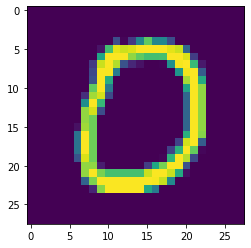

In [2]:
(x_train,y_train) , (x_test, y_test) = keras.datasets.mnist.load_data() 
x_train = x_train[:20000]
y_train = y_train[:20000]
x_test = x_test[:1000]
y_test = y_test[:1000]

plt.imshow(x_test[10])

### third stage is extracting features from images
#### first split each image into small pics 
i splited each image into -> 16 block each of them represented by -> 7 * 7 pixels                                 
I will use center of mass of each block in image that return (x,y) coordinates for each block 

centroid function calculate and return center of mass of each block 

input -> small pic 
output -> (x,y) coordinates of block and if pic is all black return (3.5, 3.5) because pic is 7 * 7 

In [3]:
def centroid(grid):
    if np.all((grid == 0)):
        return (3.5,3.5)
    return ndimage.measurements.center_of_mass(grid)

4 blocks in width and 4 blocks in hight then we have 16 small pics 

crop_image function split image into 16 small pics
then call centroid function calculate (x,y) coordinates of block
then add all centroids into one vector and return it for each image

In [4]:
def crop_feature(test_image, blocks):
    rows , cols = int(test_image.shape[0] / blocks), int(test_image.shape[1] / blocks)
    vector = list()
    k,f = cols,0
    for i in range(blocks):
        c,z = rows,0
        for r in range(blocks):
                window = test_image[f:k,z:c]
                c += rows
                z += rows
                x,y = centroid(window)
                vector.extend([x,y])
        k += cols
        f += cols
    return np.array(vector)

### convert x_train and x_test to its new vectors (centroids)

In [5]:
x_train1 = list() 
x_test1  = list() 

for i in x_train:
    x_train1.append(crop_feature(i,4))

for i in x_test:
    x_test1.append(crop_feature(i,4))

### implementing KNN from scartch 
1- calculate euclidean distance between each point from x_test and all point from x_train 

2- sort distances in ascending order

3- return k shortest distances from each point

In [6]:
class KNN():

    def __init__(self):
        pass
        
    def dist(self, point1, point2):
        return np.sqrt(np.sum(np.power((point1-point2), 2)))
    
    
    def predict(self, x_train, x_test, y_train, k):
        y_train = pd.DataFrame(y_train)
        y_pred = list()
        
        for i in x_test:
            dists = list()
            for j in x_train:
                dis = self.dist(i,j)
                dists.append(dis)

            
            df_dists = pd.DataFrame(data=dists, columns=['dist'], index = y_train[0])
            
            df_k = df_dists.sort_values(by=['dist'], axis=0)[:k]
            df_k = df_k.index
            
            out = stats.mode(df_k)[0][0]
            
            y_pred.append(out)
            
        return y_pred
    
    def accuracy(self, y_pred, y_test):
        con = 0
        for i,j in zip(y_pred, y_test):
            if(i == j):
               con += 1 
        return (con / len(y_pred)) * 100

### test accuracy with different values of k 
##### the best accuracy when we make k by 5 
##### the lowest by k = 7 because when k increase then normal, voting be harder 

In [7]:
model = KNN()

y_pred = model.predict(x_train1, x_test1, y_train, 1)

model.accuracy(y_pred, y_test)

87.4

In [8]:
y_pred = model.predict(x_train1, x_test1, y_train, 3)

model.accuracy(y_pred, y_test)

86.9

In [9]:
y_pred = model.predict(x_train1, x_test1, y_train, 5)

model.accuracy(y_pred, y_test)

87.8

In [11]:
y_pred = model.predict(x_train1, x_test1, y_train, 13)

model.accuracy(y_pred, y_test)

85.7